In [16]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve



In [17]:

# 2. Load the dataset
df = pd.read_csv('flood_monitoring_dataset.csv')



In [18]:
# 3. Display head and info
print(df.head())
print(df.info())

# 4. Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



   rain_sensor_mm  temperature_c  moisture_percent  flow_rate_lps   
0               1      23.853392         54.443388      11.584950  \
1               2      17.960423         36.961356       8.915731   
2               8      24.424952         39.135865      26.845994   
3               5      27.764299         55.413710      10.083073   
4               4      21.308115         42.423337       9.284520   

   flood_occurred  
0               0  
1               1  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rain_sensor_mm    1000 non-null   int64  
 1   temperature_c     1000 non-null   float64
 2   moisture_percent  1000 non-null   float64
 3   flow_rate_lps     1000 non-null   float64
 4   flood_occurred    1000 non-null   int64  
dtypes: float64(3), int64(2)
me


Missing values:
rain_sensor_mm      0
temperature_c       0
moisture_percent    0
flow_rate_lps       0
flood_occurred      0
dtype: int64


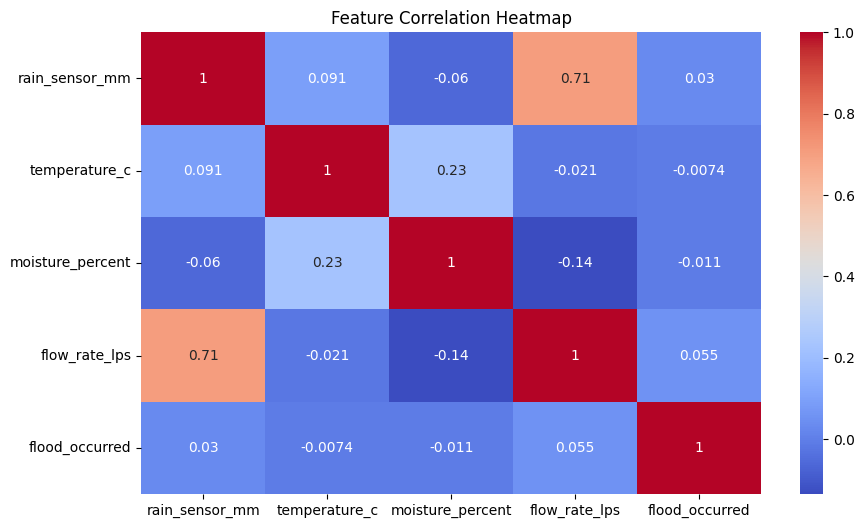

LogisticRegression(max_iter=1000)

In [23]:
# 4. Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Optional: Handle missing values if any (example using mean for numerical columns)
# df.fillna(df.mean(), inplace=True)

# 5. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 6. Prepare data for model
# Replace 'Flood' with your actual target column name
X = df.drop('flood_occurred', axis=1)
y = df['flood_occurred']

# 7. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



In [24]:
# 9. Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]



In [25]:
# 10. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.825

Confusion Matrix:
[[165   0]
 [ 35   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       165
           1       0.00      0.00      0.00        35

    accuracy                           0.82       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.68      0.82      0.75       200



c:\Users\Pushp P.Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pushp P.Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pushp P.Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

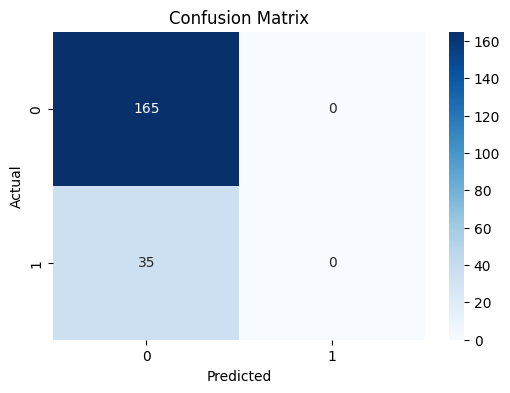

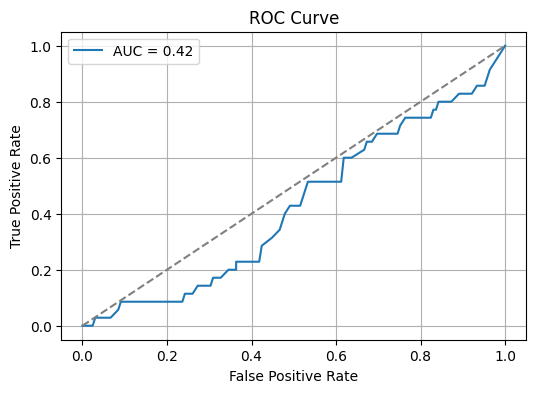

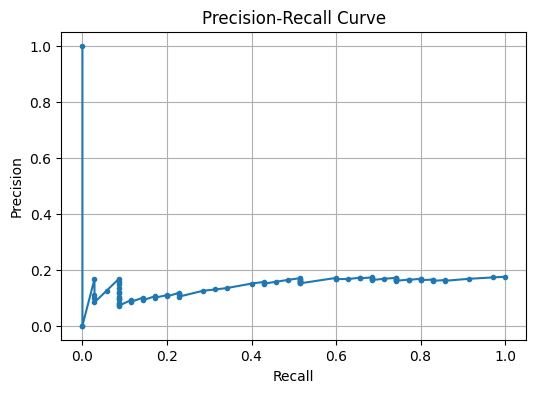

In [26]:
# 7. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 12. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# 13. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()
